In [130]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Descriptors import MolLogP, TPSA, ExactMolWt
import random
import matplotlib.pyplot as plt
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

In [131]:
# Need to develop
gene_dict = {1 : 'CC', 
             2 : 'CCC', 
             3 : 'CCCC', 
             4 : 'CC(C)C', 
             5 : 'CC(C)O', 
             6 : 'COC', 
             7 : 'CC(C)N', 
             8 : 'CCN', 
             9 : 'CNC', 
             10 : 'CC(C)F', 
             11 : 'CCF', 
             12 : 'C1CC1', 
             13 : 'C1CCC1', 
             14 : 'C1CCCC1', 
             15 : 'C1CCCCC1', 
             16 : 'C1CCCCCC1', 
             17 : 'c1ccc1', 
             18 : 'c1ccccc1', 
             19 : '[C@@H]', 
             20 : 'C=C'}

In [132]:
n_residue = len(gene_dict)
n_residue

20

# Goals
- LogP > 10
- TPSA > 10
- MW < 600

# Gene String

In [133]:
gene = [gene_dict[random.randrange(1, n_residue+1)] for i in range(2)]
print(gene)
gene = [p+gene_dict[random.randrange(1, n_residue+1)] for p in gene]
print(gene)

['CCN', 'COC']
['CCNCC(C)O', 'COCCNC']


In [134]:
def make_gen(num):
    return [gene_dict[random.randrange(1, n_residue+1)] for i in range(num)]

In [135]:
def next_gen(pop):
    return [p+gene_dict[random.randrange(1, n_residue+1)] for p in pop]

In [136]:
def natural_selection(pop, l, t, m):
    n_pop = next_gen(pop)
    next_pop = []
    for p in n_pop:
        try:
            logp = MolLogP(Chem.MolFromSmiles(p))
            tpsa = TPSA(Chem.MolFromSmiles(p))
            mw = ExactMolWt(Chem.MolFromSmiles(p))
            if logp >= l:
                if tpsa >= t:
                    if mw <= m:
                        next_pop.append(p)
        except:
            continue
    print(len(next_pop))
    return next_pop

In [137]:
first_pop_num = 5000
new_gen_num = 2000

In [138]:
population = make_gen(first_pop_num)
population = natural_selection(population, 2, 5, 600) + make_gen(new_gen_num)
population = natural_selection(population, 3, 5, 600) + make_gen(new_gen_num)
population = natural_selection(population, 4, 5, 600) + make_gen(new_gen_num)
population = natural_selection(population, 5, 5, 600) + make_gen(new_gen_num)
population = natural_selection(population, 6, 5, 600) + make_gen(new_gen_num)
population = natural_selection(population, 7, 5, 600) + make_gen(new_gen_num)
population = natural_selection(population, 8, 5, 600) + make_gen(new_gen_num)
population = natural_selection(population, 9, 10, 600) + make_gen(new_gen_num)
population = natural_selection(population, 10, 10, 600)

269
182
115
73
51
38
33
16
7


In [139]:
len(population)

7

In [140]:
print('SMILES \t\t LogP \t\t TPSA \t\t MW')
for p in population:
    print(p, '\t\t',
          round(MolLogP(Chem.MolFromSmiles(p)), 2), '\t\t', 
          round(TPSA(Chem.MolFromSmiles(p)), 2), '\t\t', 
          round(ExactMolWt(Chem.MolFromSmiles(p)), 2))

SMILES 		 LogP 		 TPSA 		 MW
CCNc1ccccc1C1CCCC1C1CCCCCC1C1CCCC1C1CC1C=CC1CCCC1COCCC(C)F 		 10.99 		 21.26 		 591.48
CC(C)OC1CCCCC1C1CCCCC1COCC1CCCCCC1[C@@H]CCCCCC(C)CCC(C)OCOC 		 10.57 		 36.92 		 591.54
C1CCCCCC1CC(C)NCC(C)CCC(C)CC1CCCCCC1CCNC=CC1CCCCC1C1CCC1C=C 		 11.48 		 24.06 		 594.59
C1CCCCCC1CNCC1CCCC1C1CCCCCC1CC[C@@H]C1CCCCCC1c1ccc1CC(C)CCNC 		 10.84 		 24.06 		 591.56
CNCC1CCCCCC1C1CCC1C1CCCCC1c1ccc1CCCC[C@@H]CCCC1CCCCCC1CCCC 		 12.42 		 12.03 		 590.57
CCNC1CCCCCC1C1CCCCC1C1CCCC1CC[C@@H]CCCC1CCCCCC1C1CCC1C1CC1 		 11.55 		 12.03 		 564.55
CC(C)Oc1ccccc1C1CCC1c1ccccc1c1ccc1C1CCCCC1CNCC=CC1CCCCC1CC 		 10.63 		 21.26 		 577.43


# Gene List

In [141]:
gene = [[random.randrange(1, n_residue+1)], [random.randrange(1, n_residue+1)]]
print(gene)
pheno = gene_dict[gene[0][0]]
print(pheno)
gene = [gene[0]+[random.randrange(1, n_residue+1)], gene[1]+[random.randrange(1, n_residue+1)]]
print(gene)
pheno = phenotype(gene)
print(pheno)

[[19], [6]]
[C@@H]
[[19, 19], [6, 6]]
[C@@H][C@@H]


In [142]:
def first_gen(num):
    return [[[random.randrange(1, n_residue+1)], [random.randrange(1, n_residue+1)]] for i in range(num)]

In [143]:
def make_gen(num, gene_num):
    return [[[random.randrange(1, n_residue+1) for g in range(gene_num)], [random.randrange(1, n_residue+1) for g in range(gene_num)]] for i in range(num)]

In [144]:
def next_gen(pop):
    return [[gene[0]+[random.randrange(1, n_residue+1)], gene[1]+[random.randrange(1, n_residue+1)]] for gene in pop]

In [145]:
def phenotype(gene):
    smiles = ''
    for i in gene[0]:
        smiles += gene_dict[i]
    return smiles

In [146]:
# Need to develop
def natural_selection(pop, l, t, m):
    n_pop = next_gen(pop)
    next_pop = []
    for gene in n_pop:
        try:
            logp = MolLogP(Chem.MolFromSmiles(phenotype(gene)))
            tpsa = TPSA(Chem.MolFromSmiles(phenotype(gene)))
            mw = ExactMolWt(Chem.MolFromSmiles(phenotype(gene)))
            if logp >= l:
                if tpsa >= t:
                    if mw <= m:
                        next_pop.append(gene)
        except:
            continue
    return next_pop

In [147]:
# Need to develop
generation = 7
logp = [2, 2, 3, 5, 6, 7, 8, 10]
tpsa = [5, 5, 5, 5, 5, 5, 10, 10]
mw = [600, 600, 600, 600, 600, 600, 600, 600]

pop_list = []
population = first_gen(first_pop_num)
for i in range(generation):
    print(i+1)
    if i+1 != generation:
        population = natural_selection(population, logp[i], tpsa[i], mw[i])
        pop_list.append(len(population))
        population += make_gen(new_gen_num, i+1)
    else:
        population = natural_selection(population, logp[i], tpsa[i], mw[i])
        pop_list.append(len(population))

1
2
3
4
5
6
7


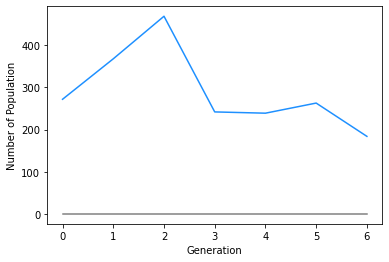

In [148]:
plt.plot(pop_list, c='dodgerblue')
plt.plot([0, generation-1], [0, 0], c='gray')
plt.xlabel('Generation')
plt.ylabel('Number of Population')
plt.show()

In [149]:
survived = []
l, t, m = 10, 10, 600
for gene in population:
    logp = MolLogP(Chem.MolFromSmiles(phenotype(gene)))
    tpsa = TPSA(Chem.MolFromSmiles(phenotype(gene)))
    mw = ExactMolWt(Chem.MolFromSmiles(phenotype(gene)))
    if logp >= l:
        if tpsa >= t:
            if mw <= m:
                print(phenotype(gene), '\t\t', 
                      round(logp, 2), '\t\t', 
                      round(tpsa, 2), '\t\t', 
                      round(mw, 2))
                survived.append(gene)

C1CCCCCC1CNCC1CCCCC1CCCCCCCCCCCC1CCCCCC1CC(C)C 		 11.89 		 12.03 		 529.56
C1CCCCCC1CC(C)Nc1ccccc1C1CCC1CCCCCCCCCC(C)CCNC 		 10.1 		 24.06 		 496.48
CC(C)Oc1ccccc1C1CCCCCC1c1ccccc1c1ccccc1C1CCCCCC1CCNc1ccccc1 		 12.14 		 21.26 		 599.41
CC(C)OC1CCCCCC1C=CCCCCC1CCCCCC1CC(C)N[C@@H]C1CCCCCC1 		 10.17 		 21.26 		 500.48
C1CCCCCC1CC(C)OCC(C)OC1CCCCCC1C1CCCCC1C1CCCC1CNCC1CCCCC1 		 10.5 		 30.49 		 585.55
C1CCCCCC1CC(C)NC1CCCCC1CCCCC1CCCCC1CC(C)OC1CC1CCC 		 10.23 		 21.26 		 515.51
CNCC1CCCCCC1CCCC1CCCC1CC(C)CC1CCCCCC1c1ccc1CC(C)C 		 10.51 		 12.03 		 509.5
CC(C)NC1CCCCCC1C1CCCCCC1[C@@H]C1CC1C1CCCCCC1CCCCCCF 		 10.09 		 12.03 		 502.48
C1CCCCCC1C1CCC1CNCC1CCCCCC1c1ccccc1C1CCCCCC1c1ccc1 		 10.1 		 12.03 		 513.43
C1CCCCC1C1CCCCC1c1ccccc1CC(C)OCOCC1CCCCC1C1CCCCCC1 		 10.24 		 18.46 		 522.44
C1CCCCCC1CC(C)NC1CC1C1CCCC1CCCCC1CCCCCC1C1CCCCCC1 		 10.86 		 12.03 		 511.51
c1ccccc1CCCCCC(C)CCC(C)Nc1ccccc1C1CCCCCC1C1CCCC1 		 10.56 		 12.03 		 487.42
c1ccccc1c1ccccc1C1CCCCCC1C1CCCCCC1CC(C)NC1CCC1CCCC 

In [150]:
len(survived)

21